# Train fashion image classification


In [22]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [23]:
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data()


y_train.shape


(60000,)

In [24]:
#Normolize
x_train, x_test = x_train / 255.0, x_test / 255.0
y_test.shape


(10000,)

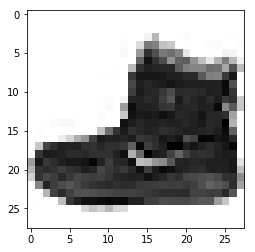

label: 9


In [25]:
i = 0
image_1 = x_train[i]
plt.imshow(image_1, cmap=plt.cm.binary)
plt.show()
print('label:',y_train[i])

In [26]:
y_train 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<h2>Prepare dataset</h2>

In [27]:
# #caltegorical encoding
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# one_hot_train_label = to_one_hot(train_label)
# one_hot_test_label  = to_one_hot(test_label)
#encode label 
#from  keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test  = to_categorical(y_test)
# y_train = np.asarray(y_train).astype('float32')
# y_test  = np.asarray(y_test).astype('float32')


#validation 
# x_val = x_train[:10000]  #100000 for test 
# partial_x_train = x_train[10000:] #50000 for train 

# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

# print('partial_x_train[shape]',partial_x_train.shape)
# print('x_val[shape]',x_val.shape)
# print('-------------------------------------')
# print('partial_y_train[shape]',partial_y_train.shape)
# print('y_val[shape]',y_val.shape)



<h2>Build Model</h2>

In [28]:
from keras.layers import Dense,Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #output class 0-9 => 10 class 
#compile model 
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',   #sparse_categorical_crossentropy
             metrics=['accuracy'])
#summary model 
model.summary()

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
print('shape x_train',x_train.shape)
print('shape x_test',x_test.shape)

print('shape y_train',y_train.shape)
print('shape y_test',y_test.shape)

shape x_train (60000, 28, 28)
shape x_test (10000, 28, 28)
shape y_train (60000,)
shape y_test (10000,)


In [30]:
#Train model 
model.fit(x_train,y_train,epochs=20)
#history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.5023 - acc: 0.8225
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3713 - acc: 0.8668
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3429 - acc: 0.8774
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3266 - acc: 0.8857
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3133 - acc: 0.8905
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3058 - acc: 0.8931
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2974 - acc: 0.8950
Epoch 8/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2924 - acc: 0.8982
Epoch 9/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2876 - acc: 0.9010
Epoch 10/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2829 - acc: 0.9

In [ ]:
model.evaluate(x_test,y_test)
#Evaluate ข้อมูลนี้ การไม่ใส่ drop out ให้ผลลัพธ์ที่ดีกว่า

<h2>Conculsion<h2>

<h2>ค้นพบการแก้ปัญหาเรื่อง dimension ด้วยการใช้ layer Flatten มาช่วยปรับ Dimension ของ input
ไม่ใช่แค่นั้นเรื่อง  matrix  ี่จะเกิดขึ้น แต่ละ output เกี่ยวกับ fucntion ต่างๆ loss layers ใช่หมดเลย

sparse_categorical_crossentropy = [1,2,3,4]
categorical_crossentropy = [[0,0,1],[0,2,3]]</h2>

In [ ]:
model.predict_classes(x_test)


In [ ]:
image_1 = x_test[0]
plt.imshow(image_1, cmap=plt.cm.binary)
plt.show()